<a href="https://colab.research.google.com/github/SARANYAP5/ds-varun/blob/main/recommendation_system_project_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
dataset1 = pd.read_csv('/content/Books.csv', encoding='latin1')
dataset2 = pd.read_csv('/content/Ratings.csv', encoding='latin1')
dataset3 = pd.read_csv('/content/Users.csv', encoding='latin1')


In [4]:
print(dataset1.columns)  # Columns in Books
print(dataset2.columns)  # Columns in Ratings
print(dataset3.columns)  # Columns in Users


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')


In [5]:
# Merge Books with Ratings on 'ISBN'
merged_books_ratings = pd.merge(dataset1, dataset2, on='ISBN')

# Merge the result with Users on 'User-ID'
full_merged_data = pd.merge(merged_books_ratings, dataset3, on='User-ID')

# Display the first few rows of the merged dataset
print(full_merged_data.head())


         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                 2002     Oxford University Press   
1  Richard Bruce Wright                 2001       HarperFlamingo Canada   
2          Carlo D'Este                 1991             HarperPerennial   
3      Gina Bari Kolata                 1999        Farrar Straus Giroux   
4       E. J. W. Barber                 1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazo

In [6]:
dataset1['ISBN'] = dataset1['ISBN'].astype(str)
dataset2['ISBN'] = dataset2['ISBN'].astype(str)
dataset2['User-ID'] = dataset2['User-ID'].astype(int)
dataset3['User-ID'] = dataset3['User-ID'].astype(int)


In [7]:
print(full_merged_data.isnull().sum())


ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    223091
dtype: int64


In [9]:
full_merged_data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [10]:
# Fill missing image URLs with a placeholder
placeholder_url = 'https://example.com/placeholder.jpg'
full_merged_data['Image-URL-M'].fillna(placeholder_url, inplace=True)
full_merged_data['Image-URL-L'].fillna(placeholder_url, inplace=True)

# Fill missing Age values with the median
median_age = full_merged_data['Age'].median()
full_merged_data['Age'].fillna(median_age, inplace=True)

# Verify the result
print(full_merged_data.isnull().sum())


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64


In [11]:
full_merged_data.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,1
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0
User-ID,0
Book-Rating,0


In [13]:
# Fill missing values in 'Book-Author' and 'Publisher' with a placeholder
full_merged_data['Book-Author'].fillna('Unknown Author', inplace=True)
full_merged_data['Publisher'].fillna('Unknown Publisher', inplace=True)

# Fill missing 'Location' with a placeholder
full_merged_data['Location'].fillna('Unknown Location', inplace=True)

# Verify that missing values have been handled
print(full_merged_data.isnull().sum())


ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64


In [15]:
full_merged_data.shape

(824672, 12)

In [14]:
# Find the total number of duplicated rows
num_duplicates = full_merged_data.duplicated().sum()

# Display the result
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [16]:
full_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824672 entries, 0 to 824671
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 824672 non-null  object 
 1   Book-Title           824672 non-null  object 
 2   Book-Author          824672 non-null  object 
 3   Year-Of-Publication  824672 non-null  int64  
 4   Publisher            824672 non-null  object 
 5   Image-URL-S          824672 non-null  object 
 6   Image-URL-M          824672 non-null  object 
 7   Image-URL-L          824672 non-null  object 
 8   User-ID              824672 non-null  int64  
 9   Book-Rating          824672 non-null  int64  
 10  Location             824672 non-null  object 
 11  Age                  824672 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 75.5+ MB


In [18]:
full_merged_data.describe()

,Year-Of-Publication,User-ID,Book-Rating,Age
count,824672.000000,824672.000000,824672.000000,824672.000000
mean,1970.082279,134995.039431,2.881232,36.648162
std,225.159675,83362.151011,3.874126,12.179380
min,0.000000,2.000000,0.000000,0.000000
25%,1992.000000,56856.000000,0.000000,31.000000
50%,1997.000000,131154.000000,0.000000,35.000000
75%,2001.000000,208671.000000,7.000000,41.000000
max,2050.000000,278854.000000,10.000000,244.000000


In [17]:
#checking unique value
full_merged_data.nunique()

,0
ISBN,129013
Book-Title,116718
Book-Author,52640
Year-Of-Publication,97
Publisher,9548
Image-URL-S,128934
Image-URL-M,128934
Image-URL-L,128934
User-ID,83129
Book-Rating,11


In [19]:

# Assuming 'full_merged_data' is your merged DataFrame
outlier_results = {}

# Identify numeric columns
numeric_cols = full_merged_data.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column to find outliers
for column in numeric_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = full_merged_data[column].quantile(0.25)
    Q3 = full_merged_data[column].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = full_merged_data[(full_merged_data[column] < lower_bound) |
                                 (full_merged_data[column] > upper_bound)]

    # Store the results in the dictionary
    outlier_results[column] = outliers

# Display outliers for each column
for column, outliers in outlier_results.items():
    print(f"Outliers for {column}:")
    print(outliers)


Outliers for Year-Of-Publication:
              ISBN                                         Book-Title  \
44      0446892041                           A Stranger in the Mirror   
184     0571197639                        Poisonwood Bible Edition Uk   
215     0380012863                        Jonathan Livingston Seagull   
233     0553210092                                 The Scarlet Letter   
289     0590021117                        Little House On the Prairie   
...            ...                                                ...   
824520  0451123549                                        Ebony Tower   
824555  B0000D9PEZ    Body in the Library, The: A Miss Marple Mystery   
824561  0003252477  A midsummer night's dream; (The Alexander Shak...   
824582  0316648442                                Business Edition Uk   
824585  0930492072                      Let's Learn a Little Hawaiian   

                Book-Author  Year-Of-Publication  \
44           Sidney Sheldon          

In [20]:
#Store Outliers in a Single DataFrame
all_outliers = pd.concat(outlier_results.values(), keys=outlier_results.keys())
print("All Outliers:")
print(all_outliers)


All Outliers:
                                  ISBN  \
Year-Of-Publication 44      0446892041   
                    184     0571197639   
                    215     0380012863   
                    233     0553210092   
                    289     0590021117   
...                                ...   
Age                 824602  0345443225   
                    824630  031286941X   
                    824648  0969419414   
                    824652  1565120353   
                    824662  0865714231   

                                                                   Book-Title  \
Year-Of-Publication 44                               A Stranger in the Mirror   
                    184                           Poisonwood Bible Edition Uk   
                    215                           Jonathan Livingston Seagull   
                    233                                    The Scarlet Letter   
                    289                           Little House On the Prairi

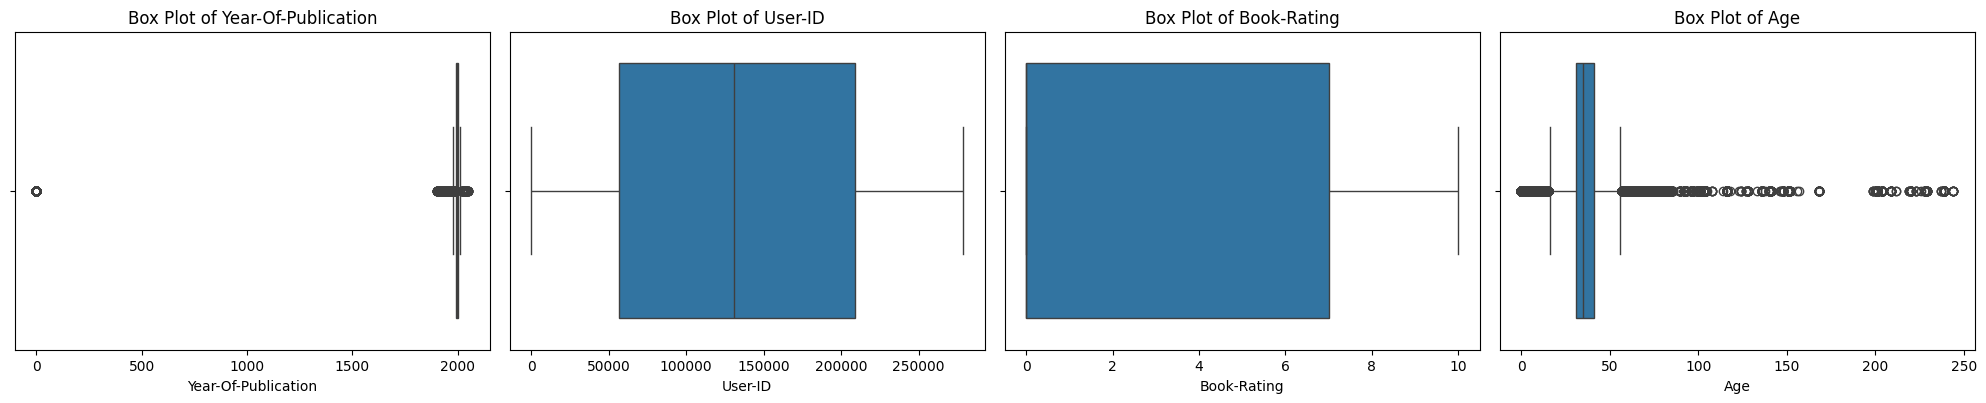

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=full_merged_data[column], showfliers=True)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    # Calculate lower and upper limits within the loop
    Q1 = full_merged_data[column].quantile(0.25)
    Q3 = full_merged_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Optionally, adjust the x-axis limits if needed
    # plt.xlim(lower_limit, upper_limit)

plt.tight_layout()
plt.show()

In [22]:
# Filter out unrealistic ages (e.g., less than 10 or greater than 100)
full_merged_data_filtered = full_merged_data[(full_merged_data['Age'] >= 10) & (full_merged_data['Age'] <= 100)]
# Fill missing age values with the median age
median_age = full_merged_data['Age'].median()

full_merged_data['Age'].fillna(median_age, inplace=True)


In [23]:
# Display the shape of the DataFrame after filtering
print(f'Shape of DataFrame before removing Age outliers: {full_merged_data.shape}')
print(f'Shape of DataFrame after removing Age outliers: {full_merged_data_filtered.shape}')

# Optional: Display the first few rows of the filtered DataFrame
print(full_merged_data.head())


Shape of DataFrame before removing Age outliers: (824672, 12)
Shape of DataFrame after removing Age outliers: (818455, 12)
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                 2002     Oxford University Press   
1  Richard Bruce Wright                 2001       HarperFlamingo Canada   
2          Carlo D'Este                 1991             HarperPerennial   
3      Gina Bari Kolata                 1999        Farrar Straus Giroux   
4       E. J. W. Barber                 1999  W. W. Norton &amp; Company   

           

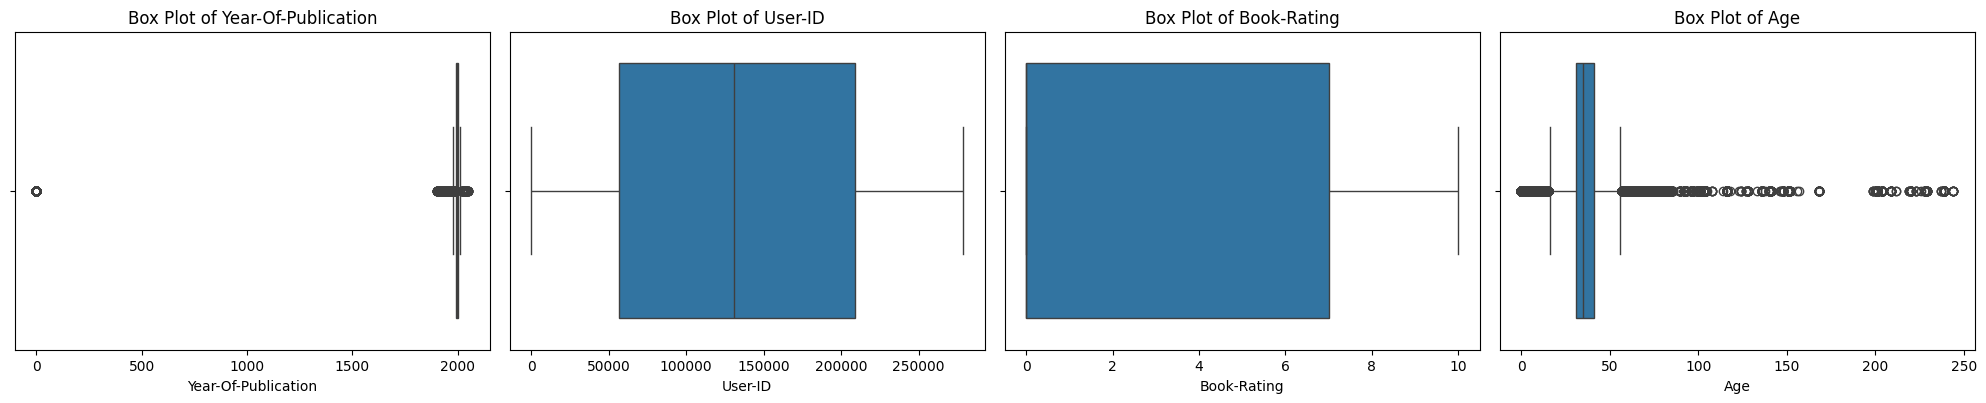

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=full_merged_data[column], showfliers=True)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    # Calculate lower and upper limits within the loop
    Q1 = full_merged_data[column].quantile(0.25)
    Q3 = full_merged_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Optionally, adjust the x-axis limits if needed
    # plt.xlim(lower_limit, upper_limit)

plt.tight_layout()
plt.show()

In [25]:
full_merged_data_filtered.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0
User-ID,0
Book-Rating,0


visualization

1. Distribution of Ratings

<ipython-input-26-c65e2080d201>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=full_merged_data, palette='coolwarm')


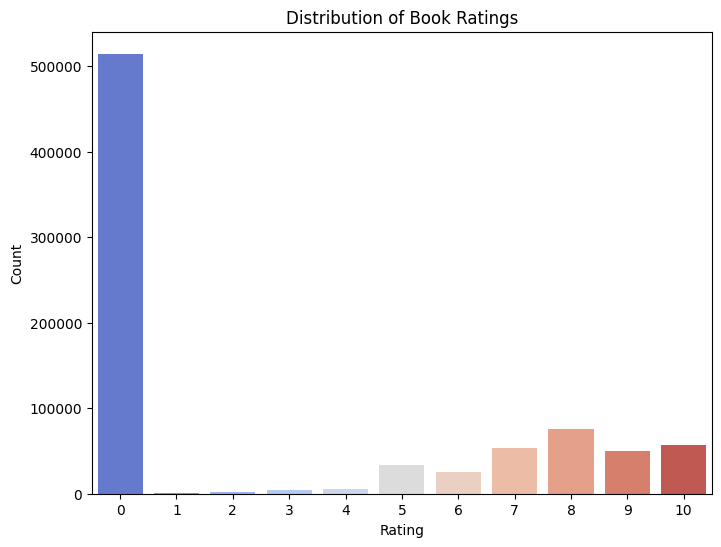

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Book-Rating', data=full_merged_data, palette='coolwarm')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Ratings by Age Group

<ipython-input-27-e065069f1d61>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_age = full_merged_data.groupby(age_groups)['Book-Rating'].mean()
<ipython-input-27-e065069f1d61>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_age.index, y=avg_rating_by_age.values, palette='cubehelix')


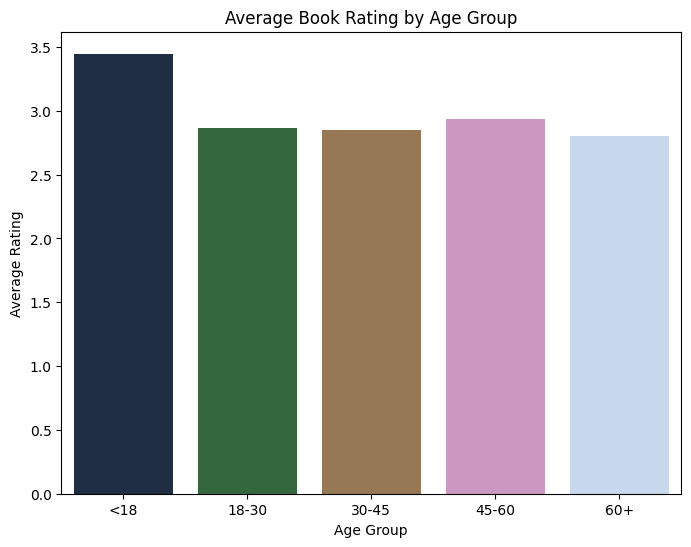

In [27]:
# Define age groups
age_groups = pd.cut(full_merged_data['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '30-45', '45-60', '60+'])

# Average rating per age group
avg_rating_by_age = full_merged_data.groupby(age_groups)['Book-Rating'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rating_by_age.index, y=avg_rating_by_age.values, palette='cubehelix')
plt.title('Average Book Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.show()


Top 10 Most Rated Books


<ipython-input-28-a3739f313a80>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_books.values, y=top_rated_books.index, palette='magma')


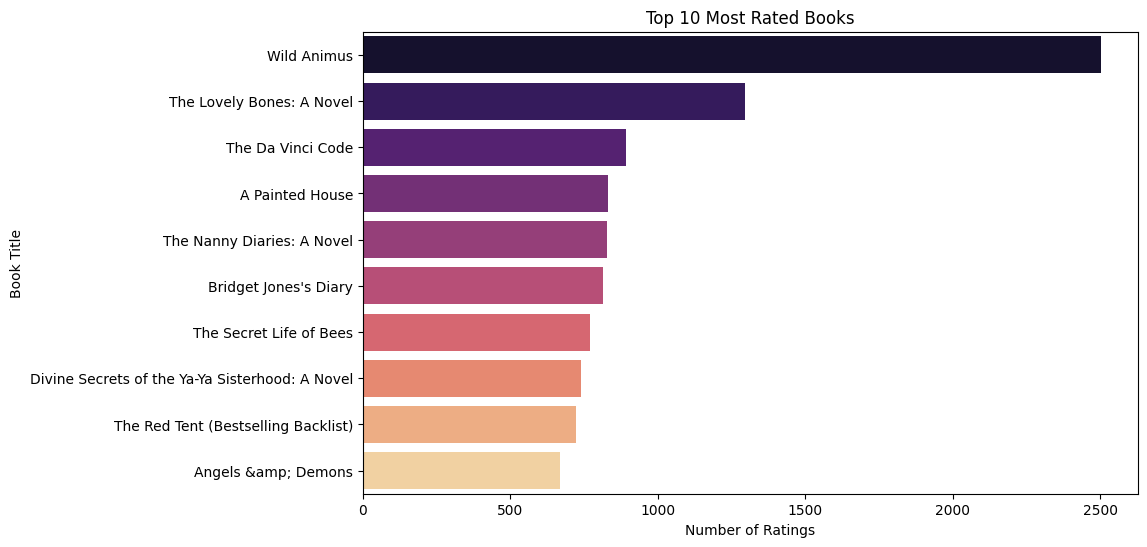

In [28]:
# Top 10 most rated books
top_rated_books = full_merged_data['Book-Title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_books.values, y=top_rated_books.index, palette='magma')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()


Average Rating per Book


<ipython-input-30-7f657fdbb4a0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_book.values, y=avg_rating_per_book.index, palette='viridis')


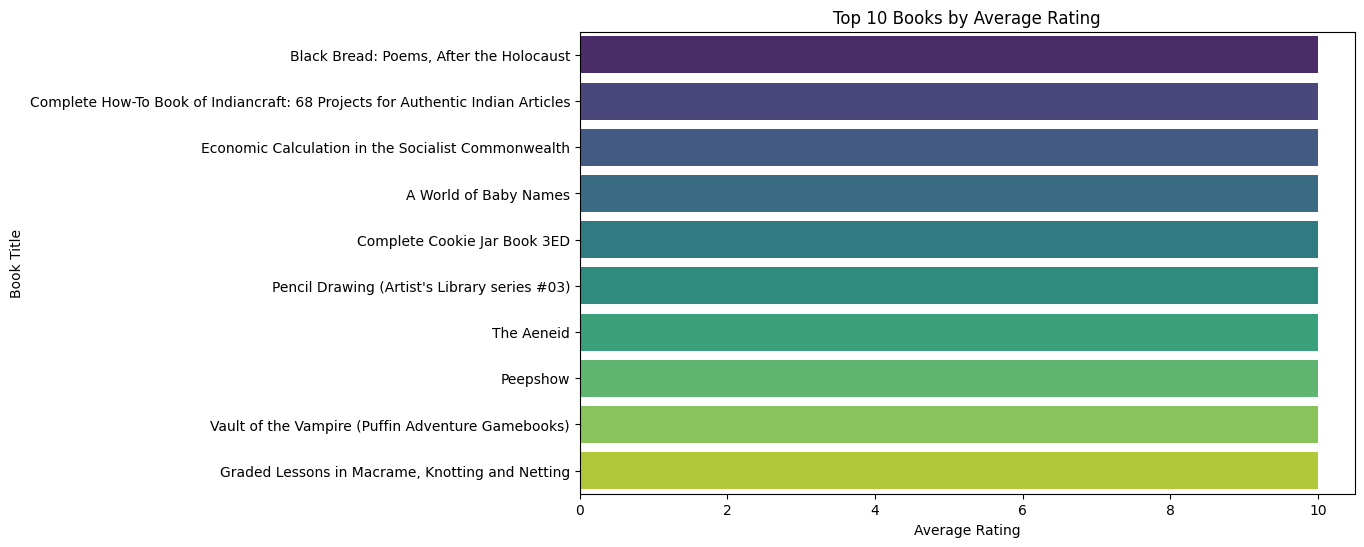

In [30]:
# Calculate average rating per book
avg_rating_per_book = full_merged_data.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_per_book.values, y=avg_rating_per_book.index, palette='viridis')
plt.title('Top 10 Books by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()


User Age Distribution

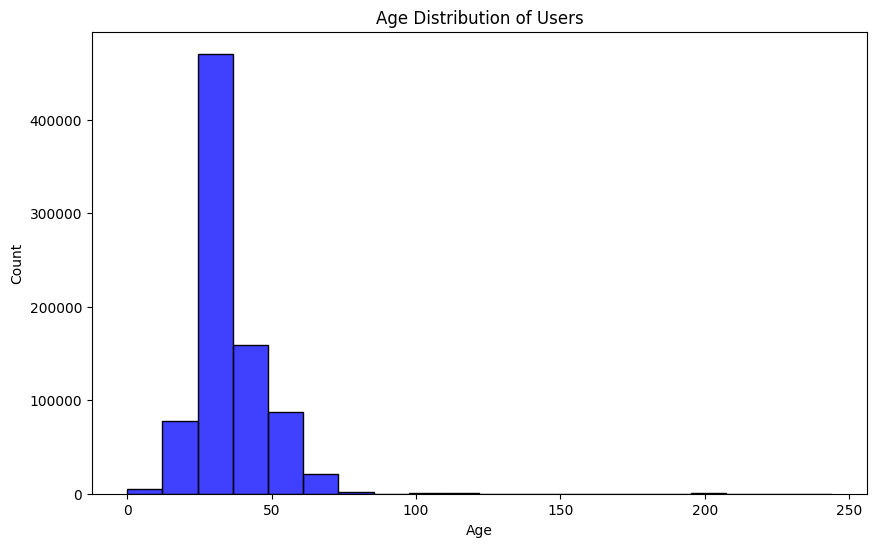

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(full_merged_data['Age'], bins=20, kde=False, color='blue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Top Authors by Number of Books Rated


<ipython-input-31-ad85d459e4f4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='plasma')


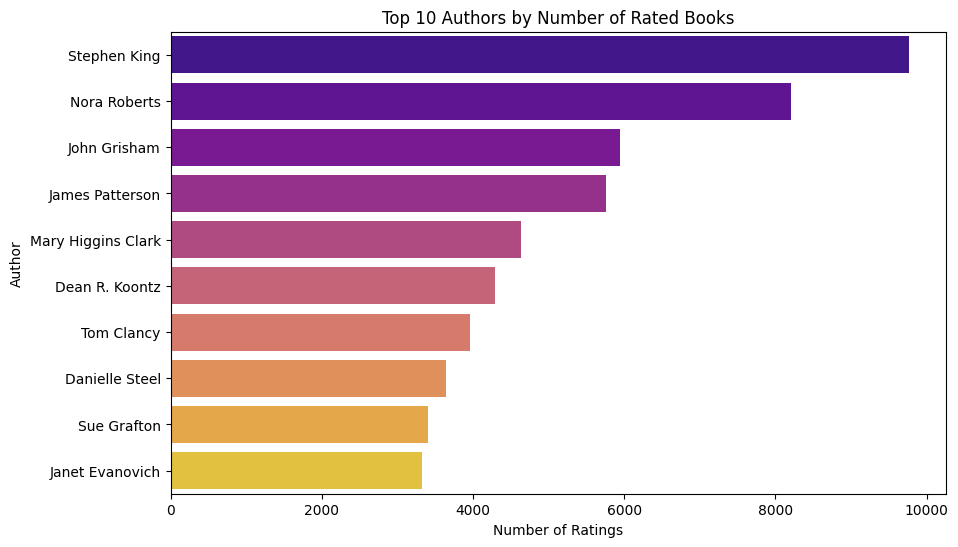

In [31]:
# Top authors by number of rated books
top_authors = full_merged_data['Book-Author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='plasma')
plt.title('Top 10 Authors by Number of Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Author')
plt.show()


model building

In [34]:
df = full_merged_data

In [35]:
import pandas as pd

# Assuming 'df' is your DataFrame containing 'User-ID', 'ISBN', 'Book-Rating'
user_item_matrix = df.pivot(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)


<ipython-input-35-ba884a1c6b7d>:4: PerformanceWarning: The following operation may generate 9702650622 cells in the resulting pandas object.
  user_item_matrix = df.pivot(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)


ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing 'User-ID', 'ISBN', 'Book-Rating'
# Aggregate ratings for duplicate User-ID and Book-Title combinations using mean.
user_item_matrix = df.groupby(['User-ID', 'Book-Title'])['Book-Rating'].mean().unstack(fill_value=0)

<ipython-input-36-f091c9a19cd3>:5: PerformanceWarning: The following operation may generate 9702650622 cells in the resulting pandas object.
  user_item_matrix = df.groupby(['User-ID', 'Book-Title'])['Book-Rating'].mean().unstack(fill_value=0)
